## Notebook to perform EDA
Author: Madhura Pande

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Read Data

In [2]:
train_features = pd.read_csv("../data/dengue_features_train.csv")
train_labels = pd.read_csv("../data/dengue_labels_train.csv")

In [3]:
# combine dataframe
train_df = train_labels.merge(train_features, how='inner', on=['city', 'year', 'weekofyear'])
train_df.shape

(1456, 25)

In [4]:
del train_features, train_labels

In [11]:
train_df['city'].unique()

array(['sj', 'iq'], dtype=object)

In [5]:
# view data for two cities separately
sj_train_df = train_df.loc[train_df['city']=='sj']
iq_train_df = train_df.loc[train_df['city'] == 'iq']

assert sj_train_df.shape[0] + iq_train_df.shape[0] == train_df.shape[0]

In [6]:
del train_df

### EDA

Peform EDA on SJ data

In [31]:
sj_train_df['week_start_date'] = pd.to_datetime(sj_train_df['week_start_date'])

In [17]:
sj_train_df.describe()

,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,936.000000,936.000000,936.000000,936,745.000000,887.000000,917.000000,917.000000,927.000000,930.000000,...,930.000000,930.000000,927.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000
mean,1998.826923,26.503205,34.180556,1999-04-26 09:35:23.076923136,0.057925,0.067469,0.177655,0.165956,35.470809,299.163653,...,30.465419,78.568181,35.470809,16.552409,2.516267,27.006528,6.757373,31.607957,22.600645,26.785484
min,1990.000000,1.000000,0.000000,1990-04-30 00:00:00,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,295.938571,...,0.000000,66.735714,0.000000,11.715714,1.357143,22.842857,4.528571,26.700000,17.800000,0.000000
25%,1994.000000,13.750000,9.000000,1994-10-27 06:00:00,0.004500,0.016425,0.139283,0.129157,0.000000,298.195000,...,10.825000,76.246071,0.000000,15.236429,2.157143,25.842857,6.200000,30.600000,21.700000,6.825000
50%,1999.000000,26.500000,19.000000,1999-04-26 12:00:00,0.057700,0.068075,0.177186,0.165971,20.800000,299.254286,...,21.300000,78.667857,20.800000,16.845714,2.457143,27.228571,6.757143,31.700000,22.800000,17.750000
75%,2003.000000,39.250000,37.000000,2003-10-23 18:00:00,0.111100,0.115200,0.212557,0.202771,52.180000,300.132857,...,37.000000,80.963214,52.180000,17.858571,2.800000,28.185714,7.285714,32.800000,23.900000,35.450000
max,2008.000000,53.000000,461.000000,2008-04-22 00:00:00,0.493400,0.437100,0.393129,0.381420,390.600000,302.200000,...,570.500000,87.575714,390.600000,19.440000,4.428571,30.071429,9.914286,35.600000,25.600000,305.900000
std,5.212076,15.021909,51.381372,NaN,0.107153,0.092479,0.057166,0.056073,44.606137,1.236429,...,35.628055,3.389488,44.606137,1.560923,0.498892,1.415473,0.835993,1.717297,1.506277,29.325811


We can see that total cases range from 0 to 461. We can explore if there is an increasing trend on cases per year
Numeric features have very different scales, which we should fix during modeling

In [18]:
# check nulls in each column
(sj_train_df.isna().sum() / sj_train_df.shape[0])*100

city                                      0.000000
year                                      0.000000
weekofyear                                0.000000
total_cases                               0.000000
week_start_date                           0.000000
ndvi_ne                                  20.405983
ndvi_nw                                   5.235043
ndvi_se                                   2.029915
ndvi_sw                                   2.029915
precipitation_amt_mm                      0.961538
reanalysis_air_temp_k                     0.641026
reanalysis_avg_temp_k                     0.641026
reanalysis_dew_point_temp_k               0.641026
reanalysis_max_air_temp_k                 0.641026
reanalysis_min_air_temp_k                 0.641026
reanalysis_precip_amt_kg_per_m2           0.641026
reanalysis_relative_humidity_percent      0.641026
reanalysis_sat_precip_amt_mm              0.961538
reanalysis_specific_humidity_g_per_kg     0.641026
reanalysis_tdtr_k              

There are small percent of nulls in each column, except ndvi_ne which has 20% nulls. Depending on model we will use, we may need to impute or drop the nulls

#### Visualization

In [32]:
sj_train_df['week_start_date'].dtype

dtype('<M8[ns]')

In [55]:
sj_train_df['yearmonth'] = pd.to_datetime(sj_train_df['week_start_date'].map(lambda x: x.strftime('%Y-%m')))
sj_train_df['yearmonth'].head(2)

0   1990-04-01
1   1990-05-01
Name: yearmonth, dtype: datetime64[ns]

<Axes: >

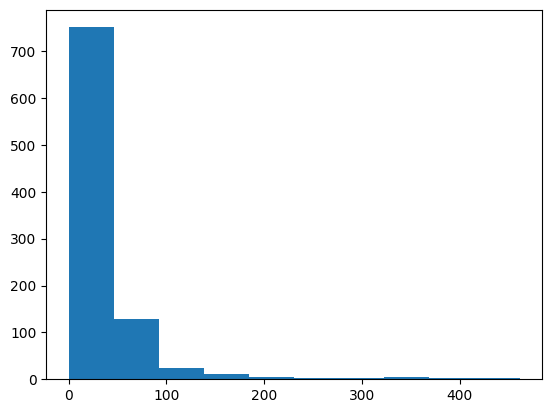

In [37]:
# plot distribution of cases
sj_train_df['total_cases'].hist(grid=False)

We can see that the distribution is skewed towards left, and from above description we can tell that 75% of data has value<=37

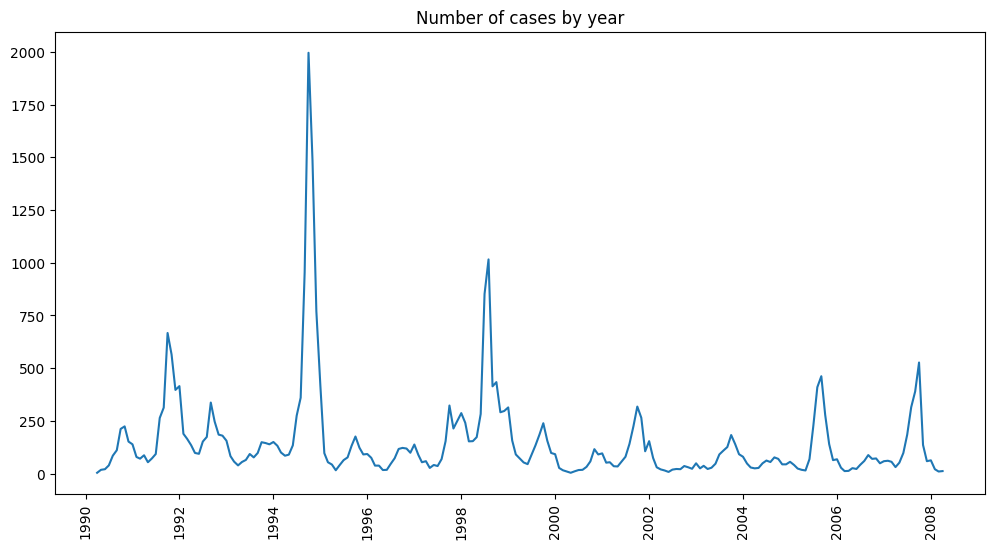

In [58]:
# plot number of cases per year
fig = plt.figure(figsize=(12,6))
group_df = sj_train_df[['yearmonth', 'total_cases']].groupby('yearmonth').sum().reset_index().sort_values(by='yearmonth')
#sns.lineplot(data=group_df, x='yearmonth', y='total_cases')
plt.plot(group_df['yearmonth'], group_df['total_cases'])
plt.xticks(rotation=90)
plt.title('Number of cases by year')
plt.show()

There were huge spikes in number of cases in 1994 and 1998. Probably because of some events? 

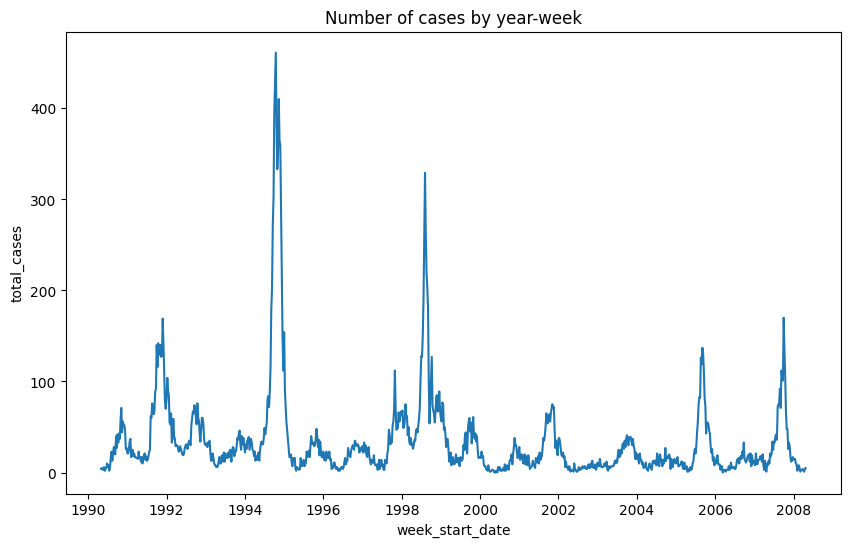

In [35]:
# plot number of cases per year-week
fig = plt.figure(figsize=(10,6))
sns.lineplot(data=sj_train_df, x='week_start_date', y='total_cases')
#plt.xticks(ticks=sj_train_df['year'].astype('int64'))
plt.title('Number of cases by year-week')
plt.show()

There is possible seasonality in data. However, an increasing trend is not observed

In [7]:
# check correlation between variables using VIF
feat_subset = [col for col in sj_train_df.columns if col not in ['city', 'year', 'weekofyear', 'week_start_date']]
subset_df = sj_train_df[feat_subset]
subset_df['intercept'] = 1
subset_df = subset_df.fillna(method='ffill')

vif = [variance_inflation_factor(subset_df.values, i) for i in range(subset_df.shape[1])]

In [9]:
vif_df = pd.DataFrame({'var': list(subset_df.columns), 'vif':vif})
vif_df.loc[vif_df['vif']>=5]

,var,vif
5,precipitation_amt_mm,inf
6,reanalysis_air_temp_k,4.536863e+03
7,reanalysis_avg_temp_k,2.721916e+02
8,reanalysis_dew_point_temp_k,6.323879e+03
9,reanalysis_max_air_temp_k,1.704413e+01
10,reanalysis_min_air_temp_k,1.878677e+01
12,reanalysis_relative_humidity_percent,1.441919e+03
13,reanalysis_sat_precip_amt_mm,inf
14,reanalysis_specific_humidity_g_per_kg,4.894435e+02
16,station_avg_temp_c,2.340208e+01


In [10]:
# recursively check by removing one feature at a time
vif2 = [variance_inflation_factor(subset_df.drop(columns=['precipitation_amt_mm']).values, i) for i in range(subset_df.drop(columns=['precipitation_amt_mm']).shape[1])]
vif3 = [variance_inflation_factor(subset_df.drop(columns=['reanalysis_sat_precip_amt_mm']).values, i) for i in range(subset_df.drop(columns=['reanalysis_sat_precip_amt_mm']).shape[1])]

In [14]:
pd.DataFrame({'var': list(subset_df.drop(columns=['precipitation_amt_mm']).columns), 'vif':vif2}).sort_values(by='vif', ascending=False)

,var,vif
20,intercept,1.820757e+07
7,reanalysis_dew_point_temp_k,6.323879e+03
5,reanalysis_air_temp_k,4.536863e+03
11,reanalysis_relative_humidity_percent,1.441919e+03
13,reanalysis_specific_humidity_g_per_kg,4.894435e+02
6,reanalysis_avg_temp_k,2.721916e+02
15,station_avg_temp_c,2.340208e+01
9,reanalysis_min_air_temp_k,1.878677e+01
8,reanalysis_max_air_temp_k,1.704413e+01
18,station_min_temp_c,1.002655e+01


In [15]:
pd.DataFrame({'var': list(subset_df.drop(columns=['reanalysis_sat_precip_amt_mm']).columns), 'vif':vif3}).sort_values(by='vif', ascending=False)

,var,vif
20,intercept,1.820757e+07
8,reanalysis_dew_point_temp_k,6.323879e+03
6,reanalysis_air_temp_k,4.536863e+03
12,reanalysis_relative_humidity_percent,1.441919e+03
13,reanalysis_specific_humidity_g_per_kg,4.894435e+02
7,reanalysis_avg_temp_k,2.721916e+02
15,station_avg_temp_c,2.340208e+01
10,reanalysis_min_air_temp_k,1.878677e+01
9,reanalysis_max_air_temp_k,1.704413e+01
18,station_min_temp_c,1.002655e+01


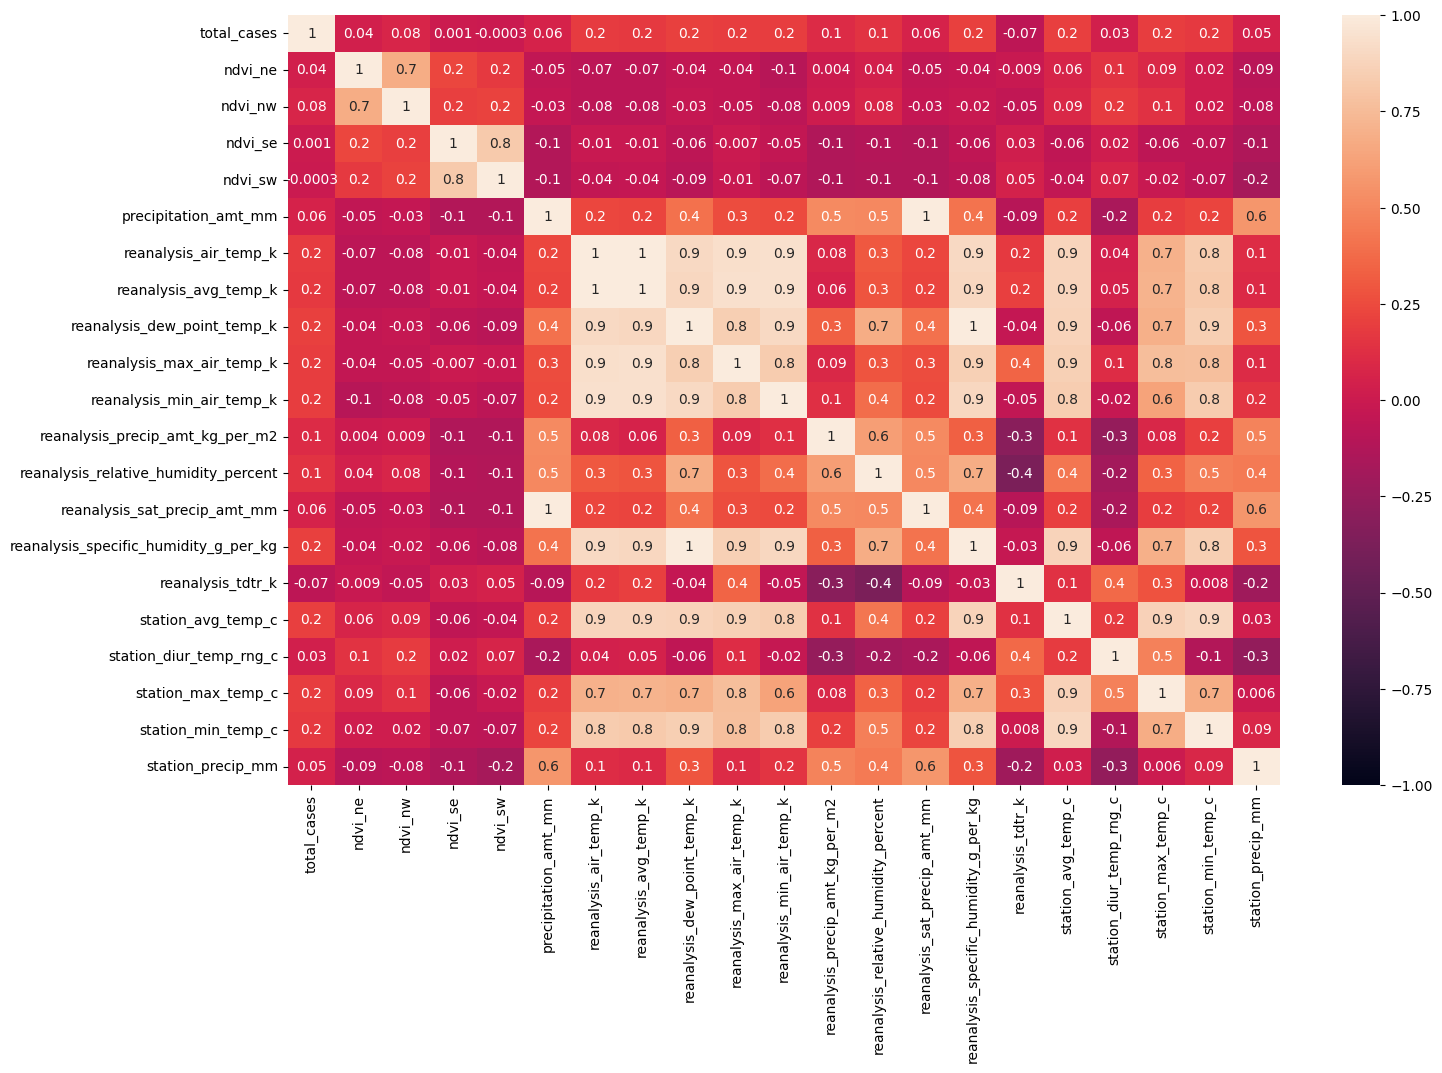

In [21]:
sj_corr = sj_train_df[feat_subset].corr()
fig=plt.figure(figsize=(16,10))
sns.heatmap(data=sj_corr, vmin=-1, vmax=1, annot=True, fmt=".1g")
plt.show()

The temperature variables are very highly correlated with each other, but less correlated with y variable. It makes sense to pick one of the temperature variable only during modeling

In [60]:
feat_subset

['total_cases',
 'ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm']

In [64]:
reduced_vars = ['total_cases', 'ndvi_ne', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k', 'reanalysis_precip_amt_kg_per_m2'
                , 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'station_precip_mm']

Perform EDA on IQ data

In [22]:
iq_train_df['week_start_date'] = pd.to_datetime(iq_train_df['week_start_date'])

<Axes: >

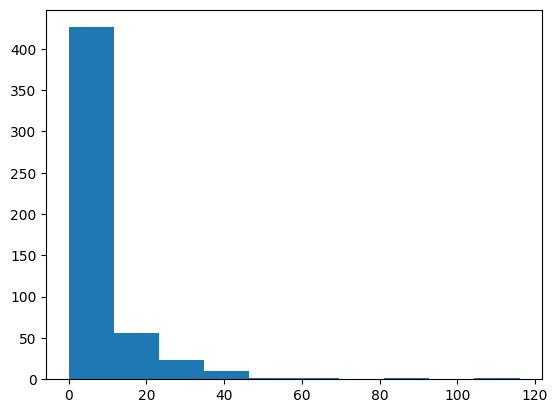

In [23]:
iq_train_df['total_cases'].hist(grid=False)

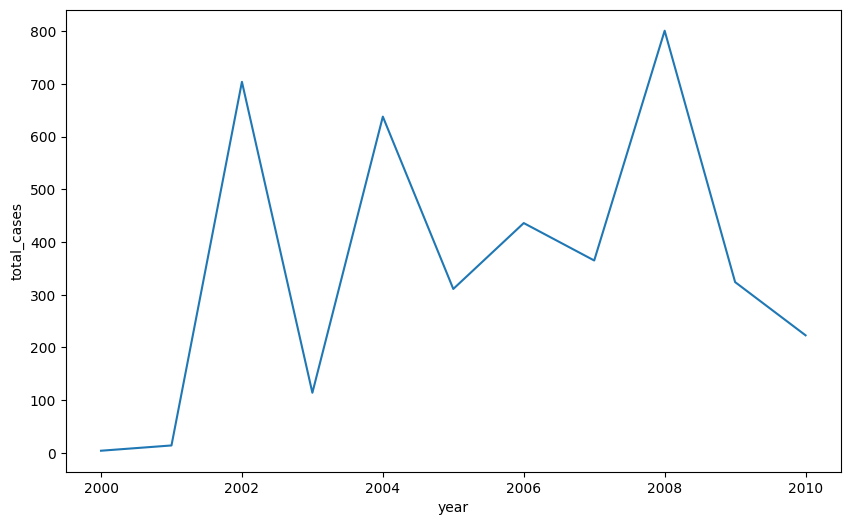

In [24]:
fig = plt.figure(figsize=(10,6))
sns.lineplot(iq_train_df[['total_cases', 'year']].groupby('year').sum().reset_index(), x='year', y='total_cases')
plt.show()

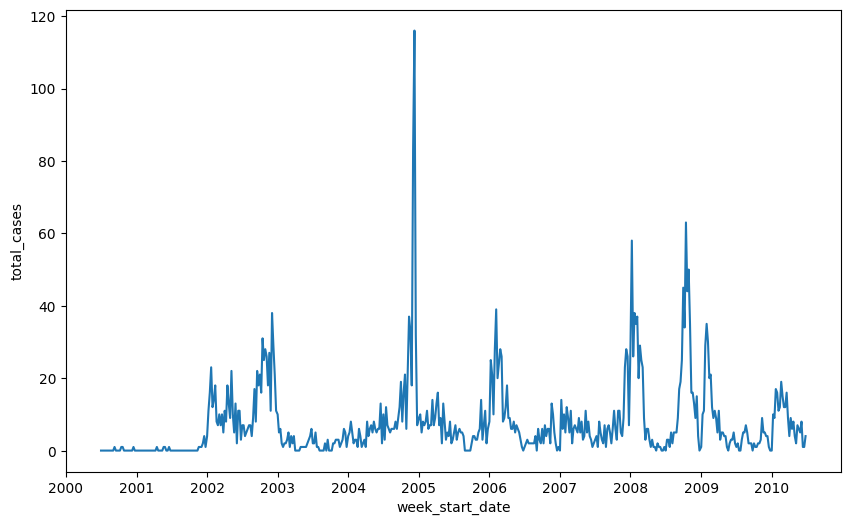

In [25]:
fig = plt.figure(figsize=(10,6))
sns.lineplot(iq_train_df[['total_cases', 'week_start_date']], x='week_start_date', y='total_cases')
plt.show()

Huge spike in 2005, but not a general increasing trend over years

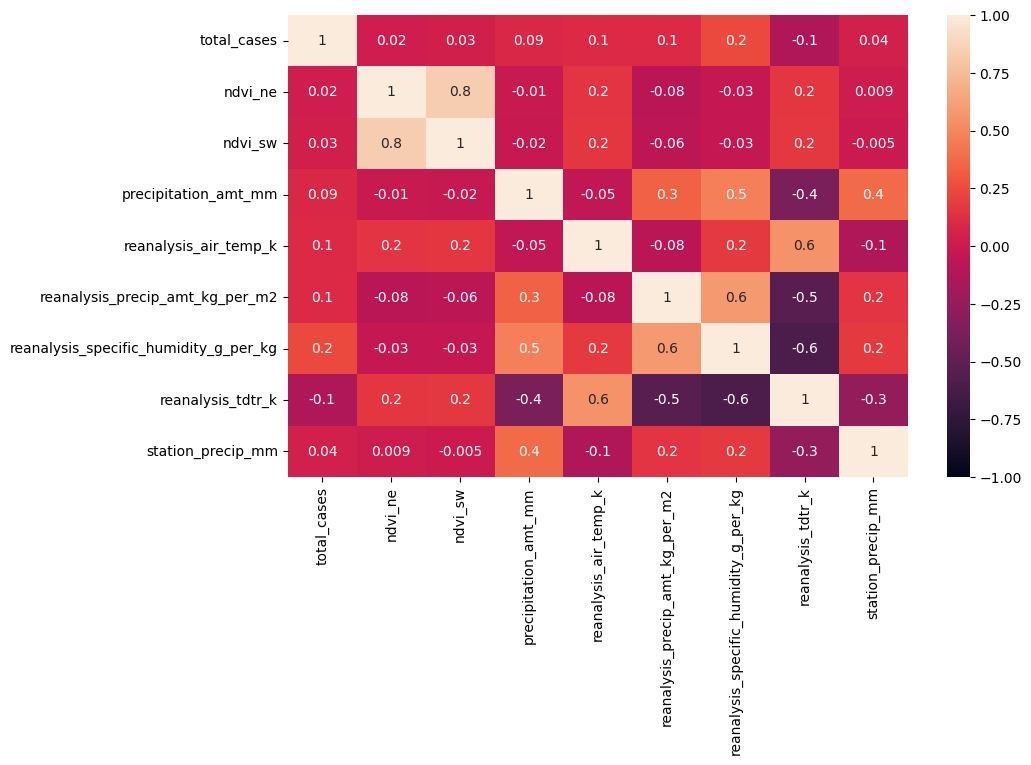

In [65]:
iq_corr = iq_train_df[reduced_vars].corr()
fig=plt.figure(figsize=(10,6))
sns.heatmap(data=iq_corr, vmin=-1, vmax=1, annot=True, fmt=".1g")
plt.show()